In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage.transform import resize
import seaborn as sns
from numpy.random import default_rng
import os
from PIL import Image

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

<class 'numpy.ndarray'>


In [20]:
#Changes size of photo

def resize_img(images, dim):
    img = []
    for i in range(len(images)):
        resized = resize(images[i], (dim,dim))
        img.append(resized)
    final = np.asarray(img, dtype=np.float32)
    return final

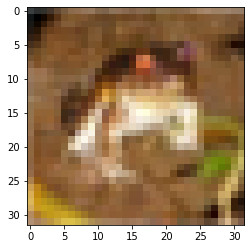

In [51]:
plt.imshow(train_images[0])

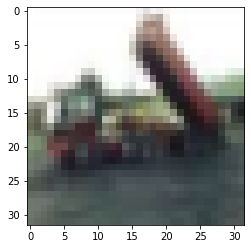

In [29]:
plt.imshow(train_images[2])

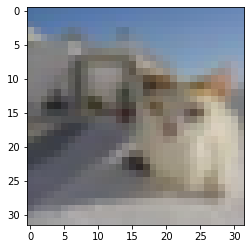

In [61]:
plt.imshow(train_images[80])

## 32 x 32

In [3]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3,3), input_shape = (32, 32, 3), activation = "relu"))
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Conv2D(64, (3,3), activation = "relu"))
cnn.add(layers.MaxPooling2D((2,2)))
#flatten step
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation = "relu")) #weights and activation together
cnn.add(layers.Dropout(0.5))
#cnn.add(layers.Dense(64, activation = "relu"))
#cnn.add(layers.Dropout(0.5))
cnn.add(layers.Dense(10, activation = "softmax"))  #last 
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                147520    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [4]:
cnn.compile(optimizer = 'adam', 
           loss = losses.SparseCategoricalCrossentropy(),
           metrics = ['accuracy'])

In [5]:
run = cnn.fit(train_images, train_labels, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.9361 - accuracy: 0.2770
Epoch 2/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4807 - accuracy: 0.4617
Epoch 3/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3482 - accuracy: 0.5166
Epoch 4/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2656 - accuracy: 0.5447
Epoch 5/50
1563/1563 [==============================] - 21s 13ms/step - loss: 1.2065 - accuracy: 0.5725
Epoch 6/50
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1621 - accuracy: 0.5853
Epoch 7/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1148 - accuracy: 0.6060
Epoch 8/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0665 - accuracy: 0.6181
Epoch 9/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0432 - accuracy: 0.6256
Epoch 10/50
1563/1563 [==============================] - 20s 13m

In [6]:
test_loss, test_acc = cnn.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.0730 - accuracy: 0.6974
0.6973999738693237


## Enlargen - 50 x 50

In [10]:
#Change to 150,150 Training
img2 = resize_img(train_images, 50)

<class 'numpy.ndarray'>
(50, 50, 3)


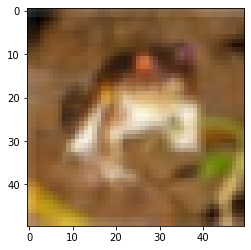

In [108]:
print(type(img2))

print(img2[0].shape)
plt.imshow(img2[0])

In [11]:
#Model must change input size

cnn2 = models.Sequential()
cnn2.add(layers.Conv2D(32, (3,3), input_shape = (50, 50, 3), activation = "relu"))
cnn2.add(layers.MaxPooling2D((2,2)))
cnn2.add(layers.Conv2D(64, (3,3), activation = "relu"))
cnn2.add(layers.MaxPooling2D((2,2)))
#flatten step
cnn2.add(layers.Flatten())
cnn2.add(layers.Dense(64, activation = "relu")) #weights and activation together
cnn2.add(layers.Dropout(0.5))
#cnn.add(layers.Dense(64, activation = "relu"))
#cnn.add(layers.Dropout(0.5))
cnn2.add(layers.Dense(10, activation = "softmax"))  #last 
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                495680    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [12]:
cnn2.compile(optimizer = 'adam', 
           loss = losses.SparseCategoricalCrossentropy(),
           metrics = ['accuracy'])

In [102]:
len(img2)

50000

In [13]:
run2 = cnn2.fit(img2, train_labels, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 51s 32ms/step - loss: 1.9515 - accuracy: 0.2765
Epoch 2/50
1563/1563 [==============================] - 51s 33ms/step - loss: 1.5154 - accuracy: 0.4437
Epoch 3/50
1563/1563 [==============================] - 51s 33ms/step - loss: 1.3677 - accuracy: 0.5054
Epoch 4/50
1563/1563 [==============================] - 52s 33ms/step - loss: 1.2627 - accuracy: 0.5404
Epoch 5/50
1563/1563 [==============================] - 52s 33ms/step - loss: 1.2038 - accuracy: 0.5626
Epoch 6/50
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1366 - accuracy: 0.5879
Epoch 7/50
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0879 - accuracy: 0.6098
Epoch 8/50
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0465 - accuracy: 0.6229
Epoch 9/50
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0066 - accuracy: 0.6383
Epoch 10/50
1563/1563 [==============================] - 51s 33m

In [14]:
#Change to 150,150 Testing
test2 = resize_img(test_images, 50)

test_loss, test_acc = cnn2.evaluate(test2, test_labels)
print(test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 1.3937 - accuracy: 0.6697
0.669700026512146


## Enlargen 60 x 60

In [15]:
#Change to 150,150 Training
img4 = resize_img(train_images, 60)

In [16]:
cnn4 = models.Sequential()
cnn4.add(layers.Conv2D(32, (3,3), input_shape = (60, 60, 3), activation = "relu"))
cnn4.add(layers.MaxPooling2D((2,2)))
cnn4.add(layers.Conv2D(64, (3,3), activation = "relu"))
cnn4.add(layers.MaxPooling2D((2,2)))
#flatten step
cnn4.add(layers.Flatten())
cnn4.add(layers.Dense(64, activation = "relu")) #weights and activation together
cnn4.add(layers.Dropout(0.5))
#cnn.add(layers.Dense(64, activation = "relu"))
#cnn.add(layers.Dropout(0.5))
cnn4.add(layers.Dense(10, activation = "softmax"))  #last 
cnn4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 58, 58, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                692288    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [17]:
cnn4.compile(optimizer = 'adam', 
           loss = losses.SparseCategoricalCrossentropy(),
           metrics = ['accuracy'])

In [18]:
run4 = cnn4.fit(img4, train_labels, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 72s 46ms/step - loss: 1.9749 - accuracy: 0.2642
Epoch 2/50
1563/1563 [==============================] - 71s 46ms/step - loss: 1.5654 - accuracy: 0.4231
Epoch 3/50
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4196 - accuracy: 0.4800
Epoch 4/50
1563/1563 [==============================] - 73s 47ms/step - loss: 1.3139 - accuracy: 0.5143
Epoch 5/50
1563/1563 [==============================] - 73s 47ms/step - loss: 1.2679 - accuracy: 0.5363
Epoch 6/50
1563/1563 [==============================] - 74s 47ms/step - loss: 1.2057 - accuracy: 0.5595
Epoch 7/50
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1683 - accuracy: 0.5712
Epoch 8/50
1563/1563 [==============================] - 74s 47ms/step - loss: 1.1127 - accuracy: 0.5946
Epoch 9/50
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0837 - accuracy: 0.6011
Epoch 10/50
1563/1563 [==============================] - 74s 47m

In [19]:
test4 = resize_img(test_images, 60)

test_loss, test_acc = cnn4.evaluate(test4, test_labels)
print(test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 1.4543 - accuracy: 0.6495
0.6495000123977661


## Smaller

In [20]:
img3 = resize_img(train_images, 16)

(16, 16, 3)


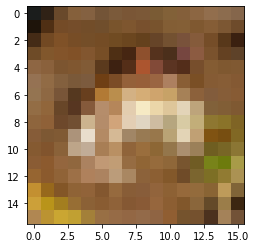

In [110]:
print(img3[0].shape)
plt.imshow(img3[0])

In [21]:
cnn3 = models.Sequential()
cnn3.add(layers.Conv2D(32, (3,3), input_shape = (16, 16, 3), activation = "relu"))
cnn3.add(layers.MaxPooling2D((2,2)))
cnn3.add(layers.Conv2D(64, (3,3), activation = "relu"))
cnn3.add(layers.MaxPooling2D((2,2)))
cnn3.add(layers.Flatten())
cnn3.add(layers.Dense(64, activation = "relu")) #weights and activation together
cnn3.add(layers.Dropout(0.5))
cnn3.add(layers.Dense(10, activation = "softmax"))  #last 
cnn3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 14, 14, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 5, 64)          18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

In [22]:
cnn3.compile(optimizer = 'adam', 
           loss = losses.SparseCategoricalCrossentropy(),
           metrics = ['accuracy'])

In [23]:
run3 = cnn3.fit(img3, train_labels, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0460 - accuracy: 0.2327
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6714 - accuracy: 0.3837
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5750 - accuracy: 0.4323
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4924 - accuracy: 0.4614
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4457 - accuracy: 0.4836
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3950 - accuracy: 0.5009
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3592 - accuracy: 0.5097
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3140 - accuracy: 0.5314
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2900 - accuracy: 0.5405
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.267

In [24]:
#Change to 150,150 Testing
test3 = resize_img(test_images, 16)

test_loss, test_acc = cnn3.evaluate(test3, test_labels)
print(test_acc)

313/313 [==============================] - 0s 958us/step - loss: 1.0935 - accuracy: 0.6261
0.6261000037193298


## 10 x 10

In [31]:
img8 = resize_img(train_images, 10)

In [32]:
cnn8 = models.Sequential()
cnn8.add(layers.Conv2D(32, (3,3), input_shape = (10, 10, 3), activation = "relu"))
cnn8.add(layers.MaxPooling2D((2,2)))
cnn8.add(layers.Conv2D(64, (3,3), activation = "relu"))
cnn8.add(layers.MaxPooling2D((2,2)))
cnn8.add(layers.Flatten())
cnn8.add(layers.Dense(64, activation = "relu")) #weights and activation together
cnn8.add(layers.Dropout(0.5))
cnn8.add(layers.Dense(10, activation = "softmax"))  #last 
cnn8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 8, 8, 32)          896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 2, 2, 64)          18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)               

In [33]:
cnn8.compile(optimizer = 'adam', 
           loss = losses.SparseCategoricalCrossentropy(),
           metrics = ['accuracy'])

In [34]:
run8 = cnn8.fit(img8, train_labels, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0667 - accuracy: 0.2175
Epoch 2/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7108 - accuracy: 0.3692
Epoch 3/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6227 - accuracy: 0.4092
Epoch 4/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5717 - accuracy: 0.4312
Epoch 5/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5319 - accuracy: 0.4464
Epoch 6/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4903 - accuracy: 0.4577
Epoch 7/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4739 - accuracy: 0.4688
Epoch 8/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4620 - accuracy: 0.4768
Epoch 9/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4460 - accuracy: 0.4809
Epoch 10/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.424

In [36]:
#Change to 150,150 Testing
test8 = resize_img(test_images, 10)

test_loss, test_acc = cnn8.evaluate(test8, test_labels)
print(test_acc)

313/313 [==============================] - 0s 963us/step - loss: 1.2401 - accuracy: 0.5579
0.5579000115394592


## 24 x 24

In [37]:
img24 = resize_img(train_images, 24)

In [38]:
cnn24 = models.Sequential()
cnn24.add(layers.Conv2D(32, (3,3), input_shape = (24, 24, 3), activation = "relu"))
cnn24.add(layers.MaxPooling2D((2,2)))
cnn24.add(layers.Conv2D(64, (3,3), activation = "relu"))
cnn24.add(layers.MaxPooling2D((2,2)))
cnn24.add(layers.Flatten())
cnn24.add(layers.Dense(64, activation = "relu")) #weights and activation together
cnn24.add(layers.Dropout(0.5))
cnn24.add(layers.Dense(10, activation = "softmax"))  #last 
cnn24.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 22, 22, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                65600     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)               

In [39]:
cnn24.compile(optimizer = 'adam', 
           loss = losses.SparseCategoricalCrossentropy(),
           metrics = ['accuracy'])

In [40]:
run24 = cnn24.fit(img24, train_labels, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.9310 - accuracy: 0.2808
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5499 - accuracy: 0.4323
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4382 - accuracy: 0.4756
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3436 - accuracy: 0.5180
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3012 - accuracy: 0.5383
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2449 - accuracy: 0.5529
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2016 - accuracy: 0.5748
Epoch 8/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1675 - accuracy: 0.5870
Epoch 9/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1322 - accuracy: 0.6010
Epoch 10/50
1563/1563 [==============================] - 12s 8ms/step - l

In [41]:
#Change to 150,150 Testing
test24 = resize_img(test_images, 24)

test_loss, test_acc = cnn24.evaluate(test24, test_labels)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.9782 - accuracy: 0.6925
0.6924999952316284


## 48 x 48

In [42]:
img48 = resize_img(train_images, 48)

In [43]:
cnn48 = models.Sequential()
cnn48.add(layers.Conv2D(32, (3,3), input_shape = (48, 48, 3), activation = "relu"))
cnn48.add(layers.MaxPooling2D((2,2)))
cnn48.add(layers.Conv2D(64, (3,3), activation = "relu"))
cnn48.add(layers.MaxPooling2D((2,2)))
cnn48.add(layers.Flatten())
cnn48.add(layers.Dense(64, activation = "relu")) #weights and activation together
cnn48.add(layers.Dropout(0.5))
cnn48.add(layers.Dense(10, activation = "softmax"))  #last 
cnn48.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                409664    
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)               

In [44]:
cnn48.compile(optimizer = 'adam', 
           loss = losses.SparseCategoricalCrossentropy(),
           metrics = ['accuracy'])

In [45]:
run48 = cnn48.fit(img48, train_labels, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 49s 31ms/step - loss: 1.9295 - accuracy: 0.2785
Epoch 2/50
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5600 - accuracy: 0.4188
Epoch 3/50
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4387 - accuracy: 0.4720
Epoch 4/50
1563/1563 [==============================] - 52s 33ms/step - loss: 1.3523 - accuracy: 0.5103
Epoch 5/50
1563/1563 [==============================] - 52s 33ms/step - loss: 1.2802 - accuracy: 0.5338
Epoch 6/50
1563/1563 [==============================] - 52s 33ms/step - loss: 1.2238 - accuracy: 0.5544
Epoch 7/50
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1805 - accuracy: 0.5746
Epoch 8/50
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1377 - accuracy: 0.5866
Epoch 9/50
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1010 - accuracy: 0.6000
Epoch 10/50
1563/1563 [==============================] - 54s 35m

In [46]:
#Change to 150,150 Testing
test48 = resize_img(test_images, 48)

test_loss, test_acc = cnn48.evaluate(test48, test_labels)
print(test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 1.2866 - accuracy: 0.6636
0.6636000275611877


## 64 x 64

In [47]:
img64 = resize_img(train_images, 64)

In [48]:
cnn64 = models.Sequential()
cnn64.add(layers.Conv2D(32, (3,3), input_shape = (64, 64, 3), activation = "relu"))
cnn64.add(layers.MaxPooling2D((2,2)))
cnn64.add(layers.Conv2D(64, (3,3), activation = "relu"))
cnn64.add(layers.MaxPooling2D((2,2)))
cnn64.add(layers.Flatten())
cnn64.add(layers.Dense(64, activation = "relu")) #weights and activation together
cnn64.add(layers.Dropout(0.5))
cnn64.add(layers.Dense(10, activation = "softmax"))  #last 
cnn64.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                802880    
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)              

In [49]:
cnn64.compile(optimizer = 'adam', 
           loss = losses.SparseCategoricalCrossentropy(),
           metrics = ['accuracy'])

In [50]:
run64 = cnn64.fit(img64, train_labels, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 91s 58ms/step - loss: 1.9268 - accuracy: 0.2870
Epoch 2/50
1563/1563 [==============================] - 90s 58ms/step - loss: 1.5356 - accuracy: 0.4379
Epoch 3/50
1563/1563 [==============================] - 91s 58ms/step - loss: 1.4198 - accuracy: 0.4812
Epoch 4/50
1563/1563 [==============================] - 92s 59ms/step - loss: 1.3225 - accuracy: 0.5152
Epoch 5/50
1563/1563 [==============================] - 91s 59ms/step - loss: 1.2550 - accuracy: 0.5418
Epoch 6/50
1563/1563 [==============================] - 91s 58ms/step - loss: 1.1982 - accuracy: 0.5646
Epoch 7/50
1563/1563 [==============================] - 91s 58ms/step - loss: 1.1536 - accuracy: 0.5810
Epoch 8/50
1563/1563 [==============================] - 92s 59ms/step - loss: 1.1260 - accuracy: 0.5935
Epoch 9/50
1563/1563 [==============================] - 91s 58ms/step - loss: 1.0774 - accuracy: 0.6066
Epoch 10/50
1563/1563 [==============================] - 91s 58m

In [51]:
test64 = resize_img(test_images, 64)

test_loss, test_acc = cnn64.evaluate(test64, test_labels)
print(test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 1.4710 - accuracy: 0.6461
0.6460999846458435


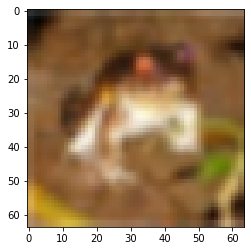

In [55]:
plt.imshow(img64[0])

# Second Dataset

In [21]:
#resize_img
data2 = []
dim = []

In [22]:
import os
from PIL import Image

names = ['cat', 'car', 'fruit', 'dog', 'person', 'flower', 'motorbike', 'airplane']
for i in names:
    cate = os.listdir('data/natural_images/' + i)
    for k in cate:
        im = Image.open('data/natural_images/' + i + '/' + k, 'r')
        photo = np.asarray(im)
        dim.append(photo.shape)
        
        
        #if np.size(data2) == 0:
        #    data2 = np.append(data2, photo)
        #else:
        #    data2 = np.vstack((data2, photo))

In [23]:
#Extracts image dimensions for examination

first = [x[0] for x in dim]
second = [x[1] for x in dim]

Mean value:  198.1923467169155
Max value:  260
Min value:  50


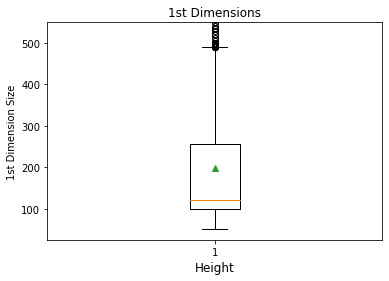

In [38]:
plt.boxplot(first, showmeans=True)
plt.ylim((25,550))
plt.ylabel('1st Dimension Size')
plt.xlabel('Height', fontsize = '12')
plt.title('1st Dimensions')
print('Mean value: ', np.mean(first))
print('Max value: ', 260)
print('Min value: ', np.min(first))

Mean value:  234.86911146542977
Max value:  300
Min value:  43


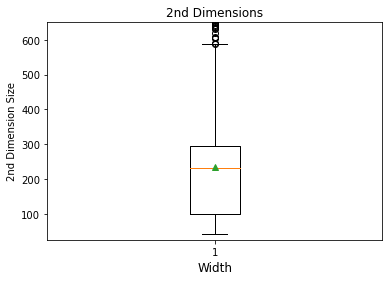

In [39]:
plt.boxplot(second, showmeans=True)
plt.ylim((25,650))
plt.ylabel('2nd Dimension Size')
plt.xlabel('Width', fontsize = '12')
plt.title('2nd Dimensions')
print('Mean value: ', np.mean(second))
print('Max value: ', 300)
print('Min value: ', np.min(second))

In [26]:
total_mean = np.around(np.mean([np.mean(first), np.mean(second)]))
total_max = np.around(np.mean([260, 300]))
total_min = np.around(np.mean([np.min(first), np.min(second)]))

print(total_mean, total_max, total_min)

217.0 280.0 46.0


In [27]:
#Extract photos
data2 = []
label = []

names = ['cat', 'car', 'fruit', 'dog', 'person', 'flower', 'motorbike', 'airplane']
for i in names:
    cate = os.listdir('data/natural_images/' + i)
    for k in cate:
        im = Image.open('data/natural_images/' + i + '/' + k, 'r')
        photo = np.asarray(im)
        data2.append(photo)
        label.append(i)
       

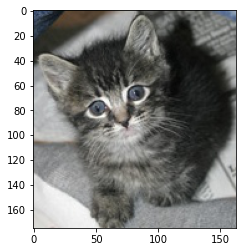

In [29]:
plt.imshow(data2[0])

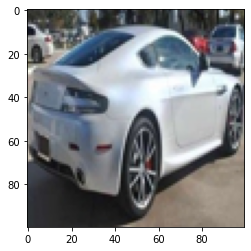

In [33]:
plt.imshow(data2[1000])

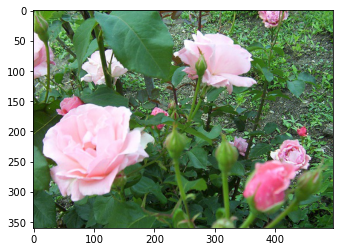

In [35]:
plt.imshow(data2[5004])

In [10]:
#Random Indexes
from numpy.random import default_rng

np.random.seed(0)
rng = default_rng()
indexes = rng.choice(6899, size = 5520, replace=False)
indexes

array([5766, 5227,  857, ..., 3342, 1528, 1308])

In [11]:
#Change labels to numerical
labels = pd.DataFrame(label)
cat_to_num = {'cat': 0, 'car': 1, 'fruit': 2, 'dog': 3, 'person': 4, 'flower': 5, 'motorbike': 6, 'airplane': 7}
num_data = labels.replace(cat_to_num)
num_label = np.asarray(num_data)

In [12]:
#Split into training (5520) and testing (1379)

#Training
x_train = np.asarray([data2[t] for t in indexes]) / 255.0
y_train = np.asarray([num_label[t] for t in indexes])
print(len(y_train))

#Testing
x_test = np.delete(data2,indexes) / 255.0
y_test = np.delete(num_label,indexes)
print(len(y_test))

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


5520
1379


In [13]:
#Reshape labels
y_train =  y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

## Mean Resize

In [132]:
img_mean = resize_img(x_train, total_mean)

In [133]:
cnn_m = models.Sequential()
cnn_m.add(layers.Conv2D(32, (3,3), input_shape = (int(total_mean), int(total_mean), 3), activation = "relu"))
cnn_m.add(layers.MaxPooling2D((2,2)))
cnn_m.add(layers.Conv2D(64, (3,3), activation = "relu"))
cnn_m.add(layers.MaxPooling2D((2,2)))
cnn_m.add(layers.Flatten())
cnn_m.add(layers.Dense(64, activation = "relu")) #weights and activation together
cnn_m.add(layers.Dropout(0.5))
cnn_m.add(layers.Dense(10, activation = "softmax"))  #last 
cnn_m.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 215, 215, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 107, 107, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 105, 105, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 52, 52, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 173056)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                11075648  
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

In [134]:
cnn_m.compile(optimizer = 'adam', 
           loss = losses.SparseCategoricalCrossentropy(),
           metrics = ['accuracy'])

In [164]:
run_m = cnn_m.fit(img_mean, y_train, epochs = 10)

Epoch 1/10
173/173 [==============================] - 117s 673ms/step - loss: 0.5344 - accuracy: 0.7962
Epoch 2/10
173/173 [==============================] - 115s 663ms/step - loss: 0.4029 - accuracy: 0.8469
Epoch 3/10
173/173 [==============================] - 111s 639ms/step - loss: 0.2895 - accuracy: 0.8908
Epoch 4/10
173/173 [==============================] - 110s 633ms/step - loss: 0.2438 - accuracy: 0.9060
Epoch 5/10
173/173 [==============================] - 110s 638ms/step - loss: 0.1904 - accuracy: 0.9219
Epoch 6/10
173/173 [==============================] - 110s 635ms/step - loss: 0.1834 - accuracy: 0.9299
Epoch 7/10
173/173 [==============================] - 110s 635ms/step - loss: 0.1622 - accuracy: 0.9389
Epoch 8/10
173/173 [==============================] - 110s 634ms/step - loss: 0.1493 - accuracy: 0.9444
Epoch 9/10
173/173 [==============================] - 110s 638ms/step - loss: 0.1240 - accuracy: 0.9504
Epoch 10/10
173/173 [==============================] - 110s 634m

In [165]:
#Testing
test_m = resize_img(x_test, total_mean)

test_loss, test_acc = cnn_m.evaluate(test_m, y_test)
print(test_acc)

44/44 [==============================] - 7s 142ms/step - loss: 0.3391 - accuracy: 0.9036
0.903553307056427


## Max Resize

In [14]:
img_max = resize_img(x_train, total_max)

In [15]:
cnn_x = models.Sequential()
cnn_x.add(layers.Conv2D(32, (3,3), input_shape = (int(total_max), int(total_max), 3), activation = "relu"))
cnn_x.add(layers.MaxPooling2D((2,2)))
cnn_x.add(layers.Conv2D(64, (3,3), activation = "relu"))
cnn_x.add(layers.MaxPooling2D((2,2)))
cnn_x.add(layers.Flatten())
cnn_x.add(layers.Dense(64, activation = "relu")) #weights and activation together
cnn_x.add(layers.Dropout(0.5))
cnn_x.add(layers.Dense(10, activation = "softmax"))  #last 
cnn_x.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 278, 278, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 139, 139, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 137, 137, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 68, 68, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 295936)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                18939968  
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [16]:
cnn_x.compile(optimizer = 'adam', 
           loss = losses.SparseCategoricalCrossentropy(),
           metrics = ['accuracy'])

In [17]:
run_x = cnn_x.fit(img_max, y_train, epochs = 10)

Epoch 1/10
173/173 [==============================] - 172s 990ms/step - loss: 2.3736 - accuracy: 0.3894
Epoch 2/10
173/173 [==============================] - 168s 973ms/step - loss: 0.6373 - accuracy: 0.7644
Epoch 3/10
173/173 [==============================] - 169s 979ms/step - loss: 0.4304 - accuracy: 0.8320
Epoch 4/10
173/173 [==============================] - 170s 985ms/step - loss: 0.3740 - accuracy: 0.8504
Epoch 5/10
173/173 [==============================] - 170s 984ms/step - loss: 0.3246 - accuracy: 0.8696
Epoch 6/10
173/173 [==============================] - 171s 988ms/step - loss: 0.2741 - accuracy: 0.8849
Epoch 7/10
173/173 [==============================] - 171s 987ms/step - loss: 0.2339 - accuracy: 0.9088
Epoch 8/10
173/173 [==============================] - 172s 994ms/step - loss: 0.2178 - accuracy: 0.9120
Epoch 9/10
173/173 [==============================] - 171s 991ms/step - loss: 0.1908 - accuracy: 0.9286
Epoch 10/10
173/173 [==============================] - 172s 994m

In [18]:
#Testing
test_x = resize_img(x_test, total_max)

test_loss, test_acc = cnn_x.evaluate(test_x, y_test)
print(test_acc)

44/44 [==============================] - 9s 209ms/step - loss: 0.3108 - accuracy: 0.8978
0.8977519869804382


## Min Resize

In [166]:
img_min = resize_img(x_train, total_min)

In [167]:
cnn_n = models.Sequential()
cnn_n.add(layers.Conv2D(32, (3,3), input_shape = (int(total_min), int(total_min), 3), activation = "relu"))
cnn_n.add(layers.MaxPooling2D((2,2)))
cnn_n.add(layers.Conv2D(64, (3,3), activation = "relu"))
cnn_n.add(layers.MaxPooling2D((2,2)))
cnn_n.add(layers.Flatten())
cnn_n.add(layers.Dense(64, activation = "relu")) #weights and activation together
cnn_n.add(layers.Dropout(0.5))
cnn_n.add(layers.Dense(10, activation = "softmax"))  #last 
cnn_n.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 44, 44, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                409664    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)               

In [168]:
cnn_n.compile(optimizer = 'adam', 
           loss = losses.SparseCategoricalCrossentropy(),
           metrics = ['accuracy'])

In [169]:
run_n = cnn_n.fit(img_min, y_train, epochs = 10)

Epoch 1/10
173/173 [==============================] - 6s 33ms/step - loss: 1.7773 - accuracy: 0.3418
Epoch 2/10
173/173 [==============================] - 6s 34ms/step - loss: 0.8769 - accuracy: 0.6798
Epoch 3/10
173/173 [==============================] - 6s 33ms/step - loss: 0.7083 - accuracy: 0.7223
Epoch 4/10
173/173 [==============================] - 6s 32ms/step - loss: 0.5821 - accuracy: 0.7692
Epoch 5/10
173/173 [==============================] - 6s 33ms/step - loss: 0.5543 - accuracy: 0.7835
Epoch 6/10
173/173 [==============================] - 6s 34ms/step - loss: 0.4495 - accuracy: 0.8219
Epoch 7/10
173/173 [==============================] - 6s 36ms/step - loss: 0.4303 - accuracy: 0.8205
Epoch 8/10
173/173 [==============================] - 6s 35ms/step - loss: 0.3943 - accuracy: 0.8358
Epoch 9/10
173/173 [==============================] - 6s 35ms/step - loss: 0.3622 - accuracy: 0.8553
Epoch 10/10
173/173 [==============================] - 6s 35ms/step - loss: 0.3434 - accura

In [170]:
#Testing
test_n = resize_img(x_test, total_min)

test_loss, test_acc = cnn_n.evaluate(test_n, y_test)
print(test_acc)

44/44 [==============================] - 0s 8ms/step - loss: 0.2927 - accuracy: 0.9014
0.90137779712677
